In [1]:
import scipy.io as sio
import numpy as np
from numpy.linalg import inv
from numpy import linalg
import math
import matplotlib.pyplot as plt

In [2]:
content = sio.loadmat('dataset3.mat')

In [3]:
X_train = np.array(content['X_trn'])
Y_train = np.array(content['Y_trn'])
X_test = content['X_tst']
Y_test = content['Y_tst']

In [4]:
learningRate = 0.00001
epsilon = 10**-5

In [5]:
def sigmoid(w,x):
    return 1 / (1 + np.exp(-1 * np.matmul(w.transpose(),x)))

In [6]:
w = np.random.rand(3,1)

In [7]:
X_tr = np.column_stack((np.ones(X_train.shape[0]), X_train))
print(X_tr.shape)


for j in range(3000):
    gradient = 0
    for i in range(0, X_tr.shape[0]):
        sig = np.subtract(Y_train[i], sigmoid(w,X_tr[i]))
        gradient += np.multiply(X_tr[i], sig)
    gradient = gradient.reshape(3,1)
    inter = np.multiply(learningRate, gradient)
    new_w = w + inter
    if(linalg.norm(np.subtract(new_w,w),1)<=epsilon):
        print(j)
        print("converged")
        print(new_w)
        w = new_w
        break
    w = new_w
new_w

(136, 3)


array([[ 0.14070996],
       [ 1.24739637],
       [-0.55850187]])

In [11]:
X_tst = np.column_stack((np.ones(X_test.shape[0]), X_test))

In [12]:
y = []
for i in range(0, X_tst.shape[0]):
    y.append((sigmoid(new_w, X_tst[i])>0.5)[0])

    

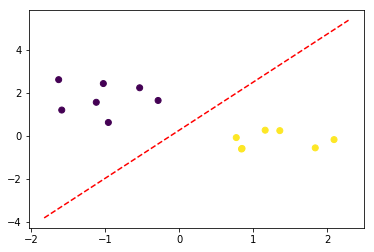

In [13]:
fig, ax = plt.subplots()
ax.scatter(X_tst[:,1],X_tst[:,2],c=y)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals *w[1] +w[0])/w[2]
plt.plot(x_vals, y_vals, '--', c="red")
plt.show()

In [16]:
fig.savefig('myplot1.png')

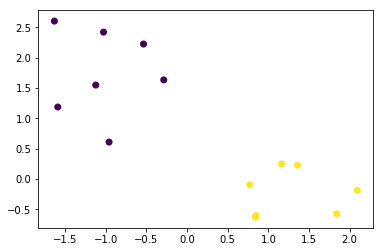

In [17]:
plt.scatter(X_tst[:,1],X_tst[:,2],c=Y_test.flatten())